
# wFunction

Ce petit module python a pour objectif de créer un circuit quantique préparant les qubits dans une distribution de votre choix.

Pour ce faire, le domaine de la distribution est transformé linéaire vers le domaine binaire $[0,2^n-1]$ ou $n$ est le nombre de qubits utilisé. La fonction d'onde préparée est donc $\sum_i f(i)|i \rangle$ ou $i$ est l'état des qubits lorsque lue en binaire et $f(i)$ est la distribution cible sur le domaine binaire évalué à $i$.

 Les fonctions du module normalisent automatiquement la distribution.

## Utilisation

Dans la cellule suivante, on importe wFunction, qiskit et numpy et on définit la distribution. Noté que la distribution dans cet exemple à deux paramètres: mu et sigma. Nous allons devoir les fixer avant de donner cette fonction à wFunction.

In [8]:
%%capture
import wFunction as wf
import qiskit as qs
import numpy as np
def lognorm(x,mu,sigma):
    return np.exp( -(np.log(x)-mu)**2/(2*sigma**2) )

Une fois la fonction définie, on crée un registre quantique avec le nombre de qubits désiré, et on appelle *Generate_circuit*.
Noté qu'on fixe les paramètres de la distribution en la plaçant dans un lambda.
Les arguments sont: la distribution, la précision de la discrétisation intermédiaire de la fonction, la fidélité du circuit, le nombre de qubits, le domaine de la fonction, le registre quantique du circuit, le nombre de couches du circuit et, finalement, le nom du circuit.

In [9]:
%%capture
threeqb = qs.QuantumRegister(3)
circ = wf.Generate_circuit(lambda x:lognorm(x,1,1),1e-5,Gate_precision=1e-12,nqbit=3,domain=[0,7],register=threeqb,Nlayer=1,name="lognormal")

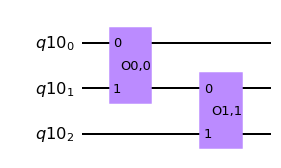

In [10]:
circ.draw('mpl')

Le circuit généré est en big-endian, la convention opposée à celle de qiskit.
On peut passer en little-endian (et vice-versa) avec la méthode *reverse_bits*

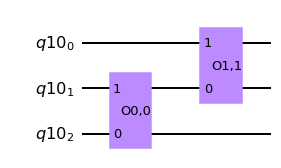

In [13]:
circ = circ.reverse_bits()
circ.draw('mpl')

Finalement, on peut observer le résultat d'une simulation.

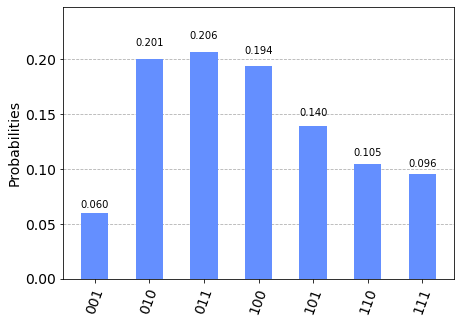

In [14]:
from qiskit import transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

circ.measure_all()
simulator = QasmSimulator()
compiled_circuit = transpile(circ, simulator)
shots = 2000
job = simulator.run(compiled_circuit, shots=shots)
result = job.result()
counts = result.get_counts(compiled_circuit)
plot_histogram(counts)
